
## DATA SCIENCE INTERNSHIP LET'S GROW MORE

## ADVANCE  LEVEL TASK

## Task 2:Next Word Prediction using Recurrent Neural Networks

Dataset link : https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

In [2]:

import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
path = '1661-0.txt'
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [4]:
#Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [5]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [6]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]


'e'

In [7]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [8]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [9]:
X.shape

(193950, 40, 73)

In [10]:
y.shape

(193950, 73)

In [11]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import pickle
import heapq

In [12]:
# Creating the model
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=7, 
                    shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 275s 178ms/step - loss: 2.0373 - accuracy: 0.4041 - val_loss: 2.2381 - val_accuracy: 0.3794
Epoch 2/7
1501/1501 [==============================] - 265s 177ms/step - loss: 1.6598 - accuracy: 0.5023 - val_loss: 2.0601 - val_accuracy: 0.4201
Epoch 3/7
1501/1501 [==============================] - 192s 128ms/step - loss: 1.5434 - accuracy: 0.5337 - val_loss: 1.9733 - val_accuracy: 0.4485
Epoch 4/7
1501/1501 [==============================] - 142s 95ms/step - loss: 1.4801 - accuracy: 0.5513 - val_loss: 1.9547 - val_accuracy: 0.4577
Epoch 5/7
1501/1501 [==============================] - 138s 92ms/step - loss: 1.4396 - accuracy: 0.5618 - val_loss: 1.9093 - val_accuracy: 0.4696
Epoch 6/7
1501/1501 [==============================] - 131s 87ms/step - loss: 1.4083 - accuracy: 0.5707 - val_loss: 1.9346 - val_accuracy: 0.4670
Epoch 7/7
1501/1501 [==============================] - 140s 93ms/step - loss: 1.3864 - accuracy: 0.5760 - val_loss: 1.946

## saving our model

In [16]:
model.save('NW_keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

## loading our model

In [17]:
model = load_model('NW_keras_model.h5')
history = pickle.load(open("history.p", "rb"))

# Model Evaluation

In [18]:

loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 120s 20ms/step - loss: 1.3474 - accuracy: 0.5856
Test Loss 1.3474459648132324
Test Accuracy 0.585552990436554


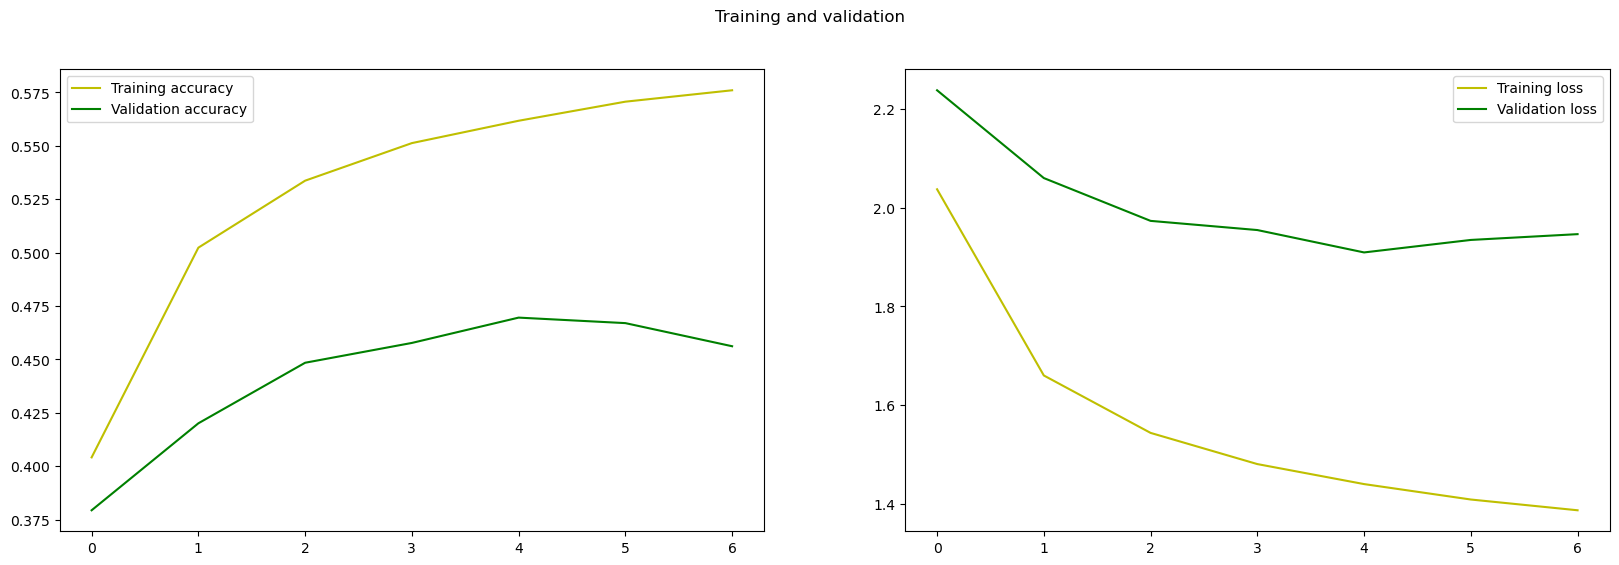

In [19]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [21]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## functions to get next probable characters

In [22]:

def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [23]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [26]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

# Prediction

In [27]:

quotes = [   
    "Let's Learn Together, Let's Grow Together",
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "LSTM networks are an extension of recurrent neural networks (RNNs) mainly introduced to handle situations where RNNs fail."
]

In [28]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

let's learn together, let's grow togethe
['r ', 'y. ', 'n, ', 'e ', ' little ']

deep learning is subset of machine learn
['ed ', ' of ', '. ', '\nof ', 'ing ']

machine learning  is the study of comput
['ter ', 'ion ', 'e ', 'sion ', ' the ']

lstm networks are an extension of recurr
['one ', 'ation ', 'ing ', 'ly ', 'ence ']

